# Generalization with OOP: The SMABacktester Class

## Using the SMABacktester Class

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [4]:
# 거래일에 따라 서로 다른 공휴일이 있기 때문에 데이터 갯수에 차이가 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [5]:
# SMA 백테스트 클래스가 포함되어 있
import SMABacktester as SMA

In [6]:
# 객체를 인스턴스화 하기
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [7]:
# 거래 전략을 테스트하기
tester.test_strategy()

(1.2835, 0.367674)

In [8]:
# 백테스트의 상세 결과를 확인하기
#가격, 데이터, 로그 수익률, SMA_S, SMA_L, 포지션, 전략수익률, 매수후 보유 누적 수익률, 전략 누적 수익률
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


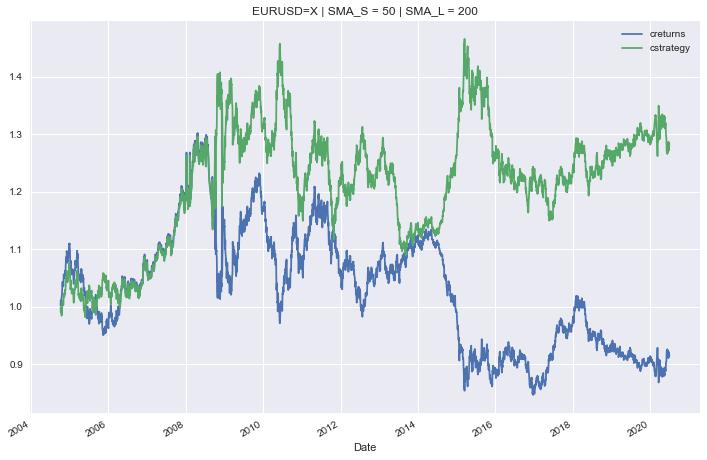

In [9]:
# 매수 후 보유와 전략을 비교하기
tester.plot_results()

In [10]:
# 매개변수 변경하기
tester.set_parameters(22, 100)

In [11]:
# 변경한 매개변수를 테스트하기
tester.test_strategy()

(1.165483, 0.228524)

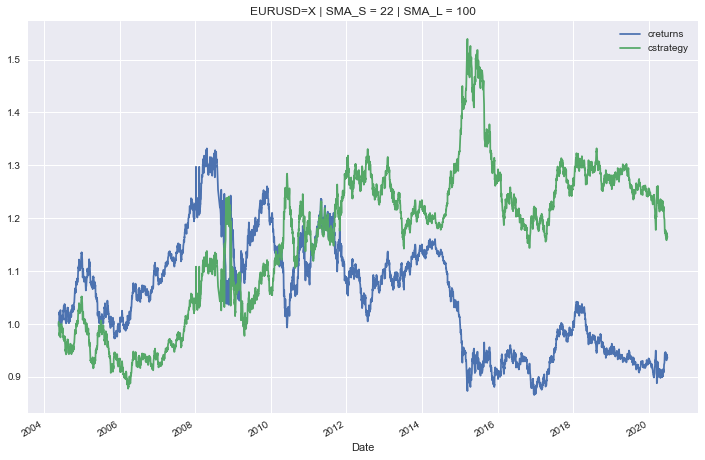

In [12]:
tester.plot_results()

In [13]:
# 매개변수를 최적화하여 최적의 전략을 구하기
tester.optimize_parameters((25, 50,1), (100, 200, 1))

(array([ 46., 137.]), 2.526694)

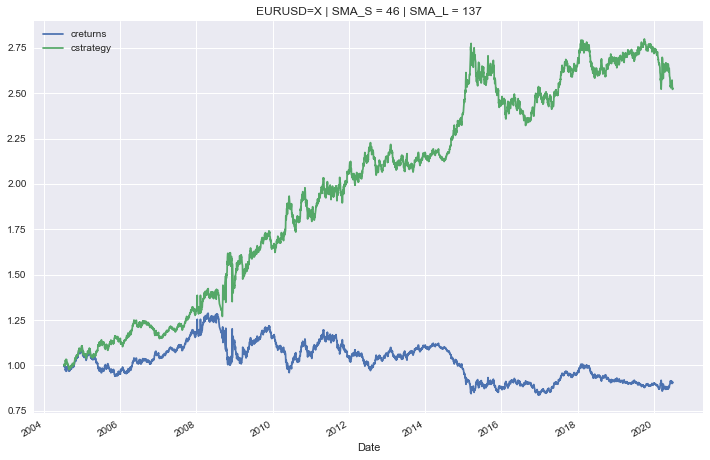

In [14]:
tester.plot_results()

__Backtesting & Forward Testing__

전략의 최적화를 위해 과거의 데이터에 피팅시킬 경우, 백테스팅이 위험할 수 있음
백테스터 클래스를 이용하면, 특정 기간을 기반으로 전략의 최적화를 위해 피팅시키는 것이 비교적 간단해짐
- 예시: 2004년~2025년

In [17]:
# 백테스트 인스턴스 생성하기
# 학습데이터(In-sample data:표본 내 데이터) 사용
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31")

In [18]:
# 해당 기간을 기반으로 전략과 백테스팅 최적화 진행
train.optimize_parameters((25, 50,1), (100, 200,1))

(array([ 46., 137.]), 2.440535)

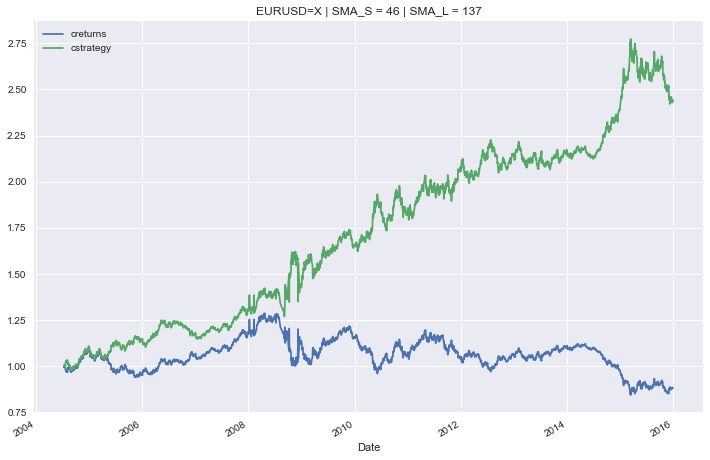

In [19]:
# 백테스팅 시각화
train.plot_results()

In [22]:
# 포워드 테스팅은 더욱 유의미함
# 새로운 백테스팅 객체 생성하기 
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01", "2020-06-30")

In [23]:
tester.test_strategy() # (out-sample/표본 외 데이터)

(1.056731, 0.038331)

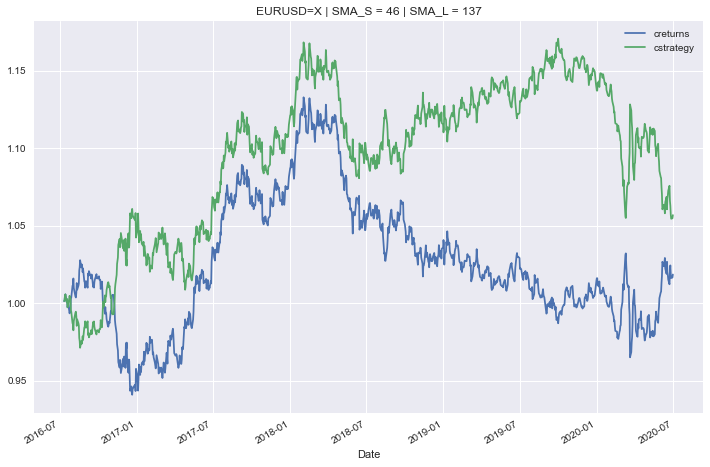

In [24]:
tester.plot_results()

테스트 기간 동안 초과성능이 있긴 하지만, 훈련 기간보다는 약한 성능을 보여줌
투자와 파이낸싱에 있어서 중요한 발견이자 원칙
- 과거에 효과가 있었던 전략이 미래에서도 반드시 유효한 것은 아님

In [25]:
# 호주달러/유로로 상품을 바꿔서 백테스팅 하기
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [26]:
tester.test_strategy()

(1.145599, 0.106464)

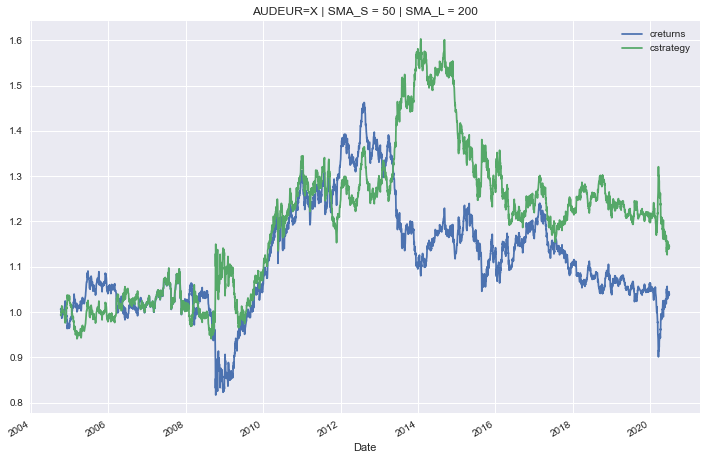

In [27]:
tester.plot_results()

In [28]:
# 차트를 보면 이 전략은 그다지 신뢰할 수 없음
# 전략 최적화 하기
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 33., 197.]), 1.457339)

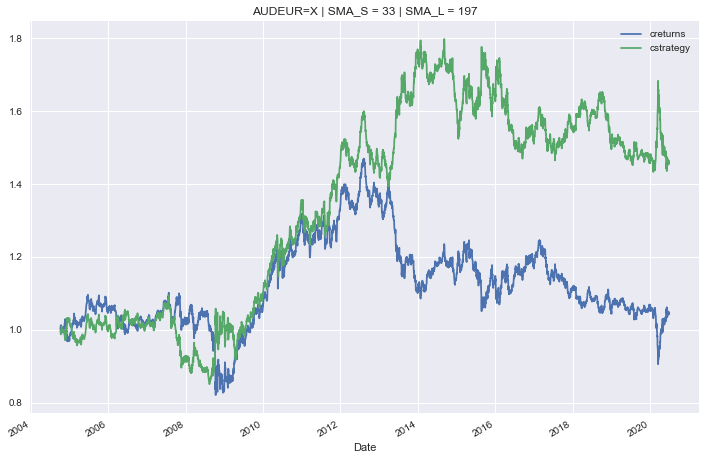

In [29]:
tester.plot_results()

In [30]:
# 2가지 주요 결과
# 1. 과거의 초과 성과가 미래의 초과 성과를 보장하지 않음
# 2. 어떤 상품에서 효과가 있는 전략이 다른 상품에서도 반드시 유효한 것은 아님

### __Building the SMABacktester Class from scratch: Instantiation__